<a href="https://colab.research.google.com/github/nguyenhaidang94/house-price-prediction/blob/main/which_factors_influence_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [19]:
%cd "drive/MyDrive/Colab Notebooks/Practice/HousePricePrediction"
%ls

/content/drive/MyDrive/Colab Notebooks/Practice/HousePricePrediction
test.csv  train.csv  which-factors-influence-house-price.ipynb


In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()

# Load data

In [21]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [22]:
print(f"Number of training samples: {train.shape[0]}")
print(f"Number of features in training set: {train.shape[1]}")
print(f"Number of test samples: {test.shape[0]}")
print(f"Number of features in test set: {test.shape[1]}")
print("Features:")
print(train.columns.values)

Number of training samples: 1460
Number of features in training set: 81
Number of test samples: 1459
Number of features in test set: 80
Features:
['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'W

In [23]:
numerical_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                      '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
ordinal_features = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
                    'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
                    'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
                    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'YrSold']
categorical_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
                        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                        'CentralAir', 'Electrical', 'Functional', 'GarageType', 'MiscFeature', 'MoSold', 'SaleType',
                        'SaleCondition']

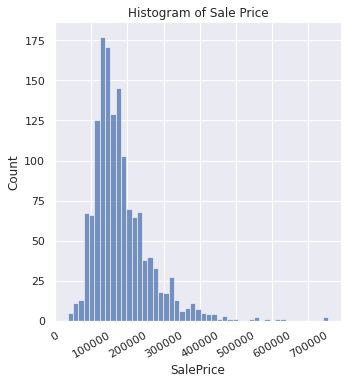

In [24]:
# histogram of Sale price
g = sns.displot(train, x="SalePrice")
g.set(title="Histogram of Sale Price")
plt.xticks(rotation=30)
plt.show()

# Process and Visualize

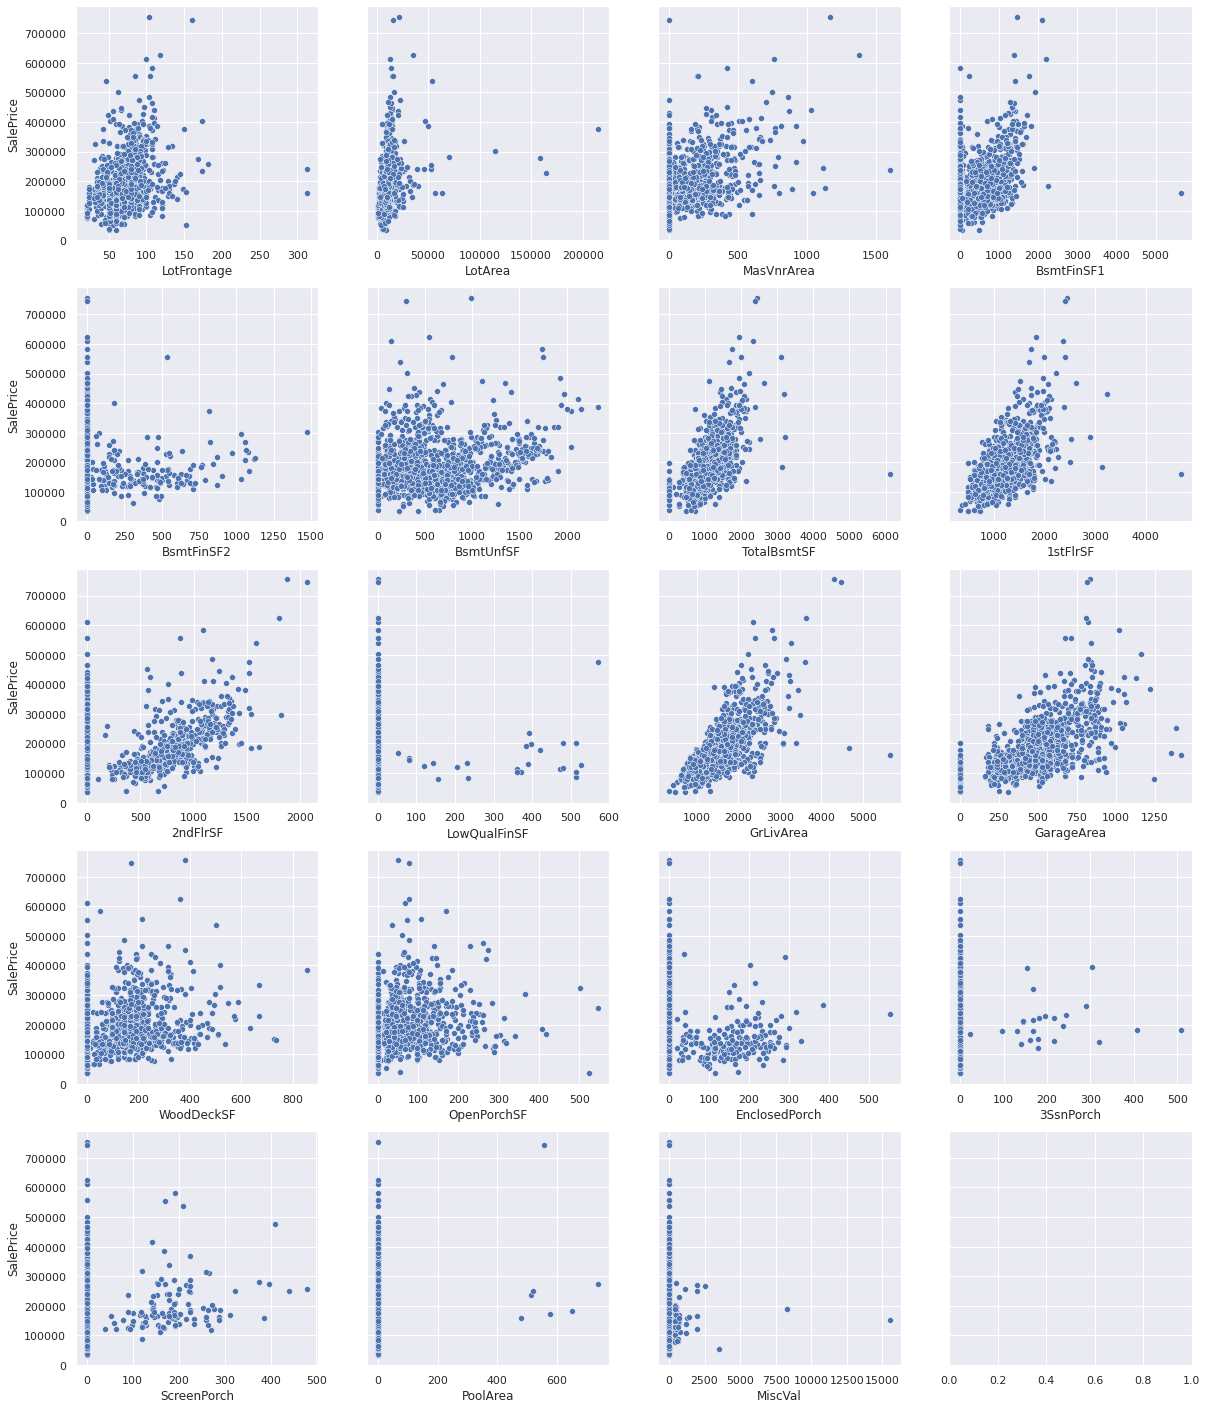

In [25]:
fig, axes = plt.subplots(5, 4, sharey=True, figsize=(20,25))
axes = np.ravel(axes)
for i in range(len(numerical_features)):
    sns.scatterplot(data=train, x=numerical_features[i], y="SalePrice", ax=axes[i])

There are several outliers in the plot of LotFrontage, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea, EnclosedPorch, MiscVal

## Drop outliers in numerical features

In [26]:
# drop LotFrontage > 300
train = train.drop(train[train.LotFrontage > 300].index)
# drop BsmtFinSF1 > 5000
train = train.drop(train[train.BsmtFinSF1 > 5000].index)
# Drop TotalBsmtSF > 6000
train = train.drop(train[train.TotalBsmtSF > 6000].index)
# Drop 1stFlrSF > 4000
train = train.drop(train[train["1stFlrSF"] > 4000].index)
# Drop GrLivArea > 4000 & SalePrice < 200000
train = train.drop(train[(train.GrLivArea > 4000) & (train.SalePrice < 200000)].index)
# Drop EnclosedPorch > 500
train = train.drop(train[train.EnclosedPorch > 500].index)
# Drop MiscVal > 7500
train = train.drop(train[train.MiscVal > 7500].index)
print(f"Number of samples remaining: {train.shape[0]}")

Number of samples remaining: 1454


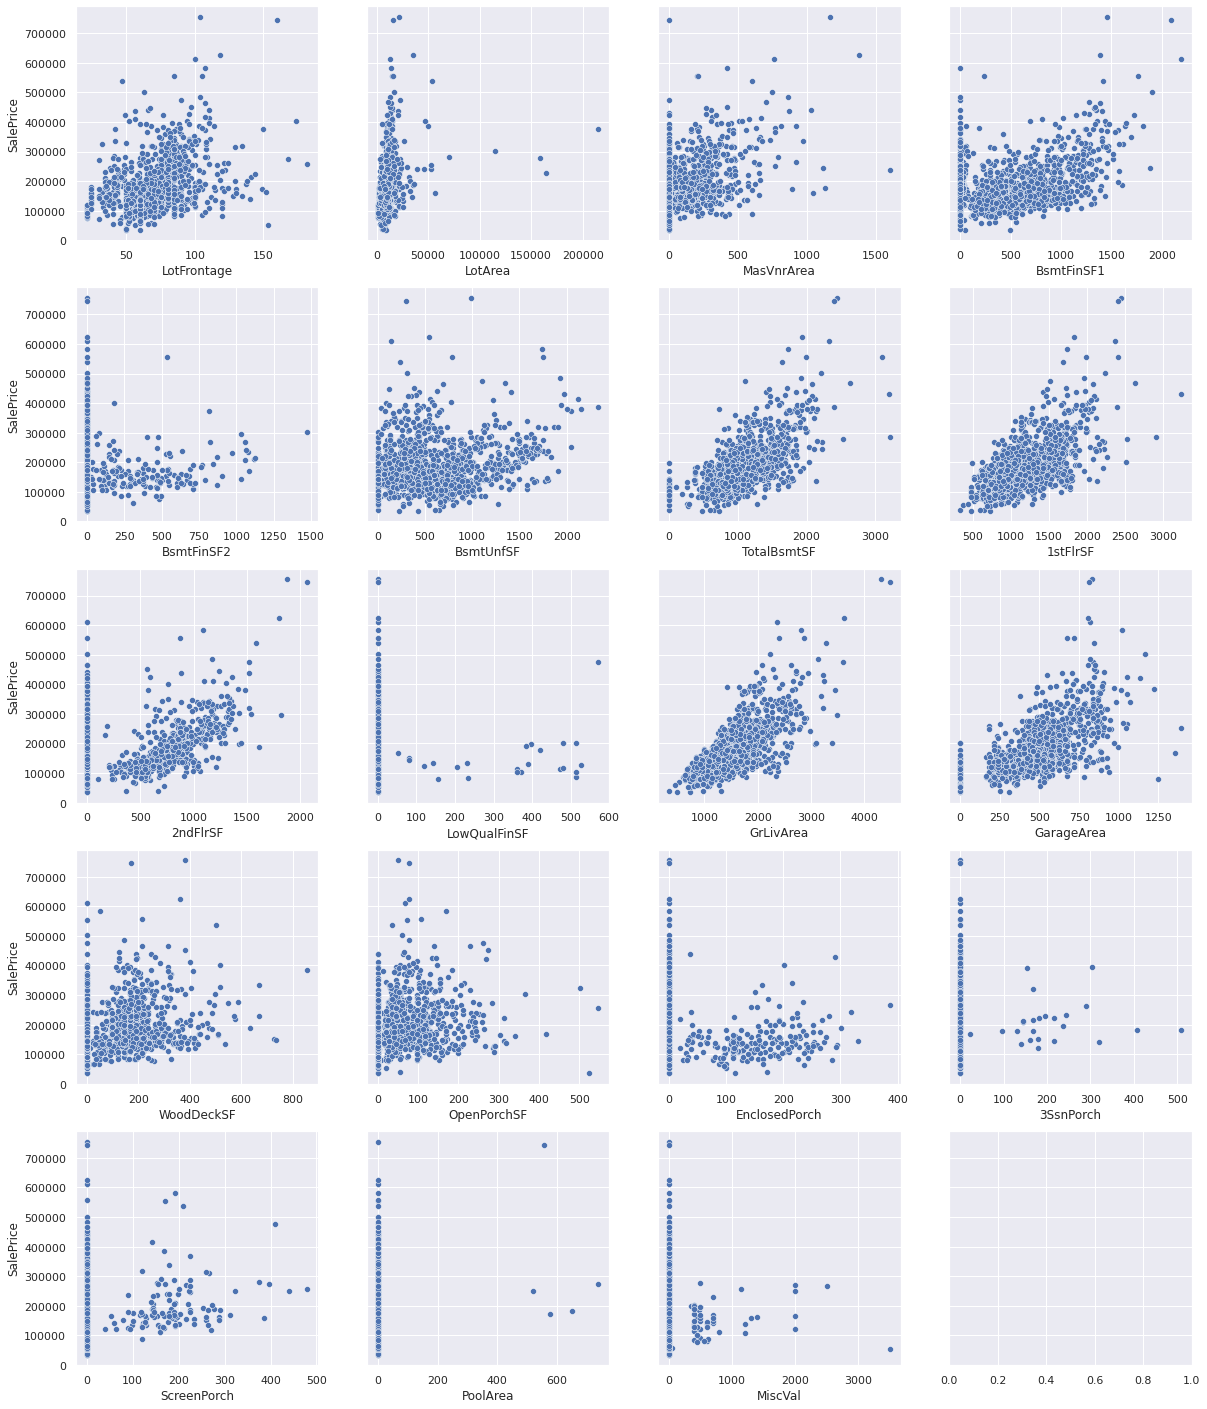

In [27]:
# Scatterplot the data
fig, axes = plt.subplots(5, 4, sharey=True, figsize=(20,25))
axes = np.ravel(axes)
for i in range(len(numerical_features)):
    sns.scatterplot(data=train, x=numerical_features[i], y="SalePrice", ax=axes[i])

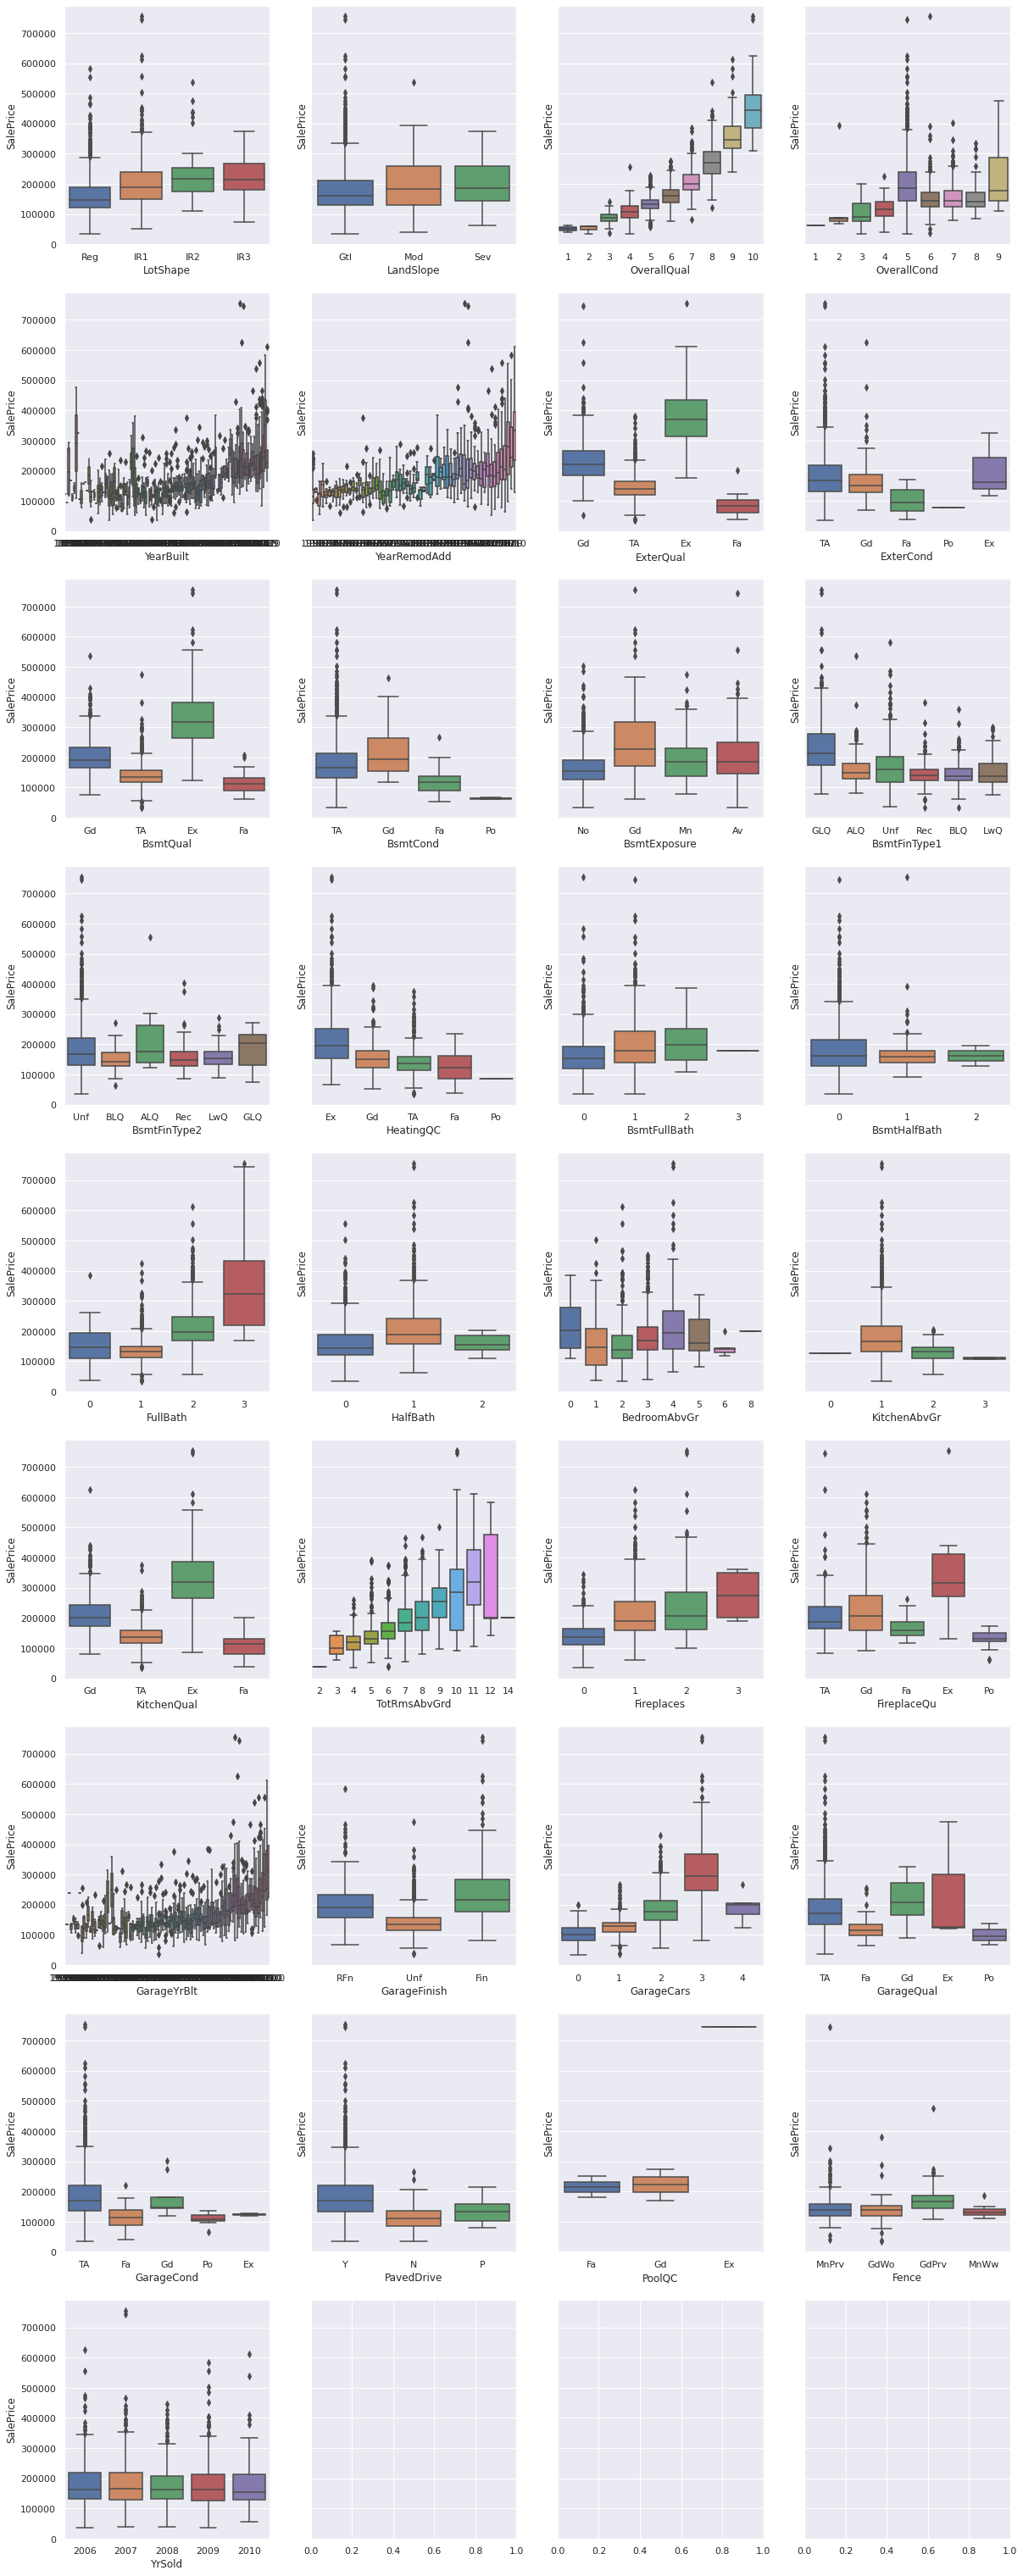

In [28]:
# Plot ordinal features
fig, axes = plt.subplots(9, 4, sharey=True, figsize=(20,55))
axes = np.ravel(axes)
for i in range(len(ordinal_features)):
    sns.boxplot(data=train, x=ordinal_features[i], y="SalePrice", ax=axes[i])

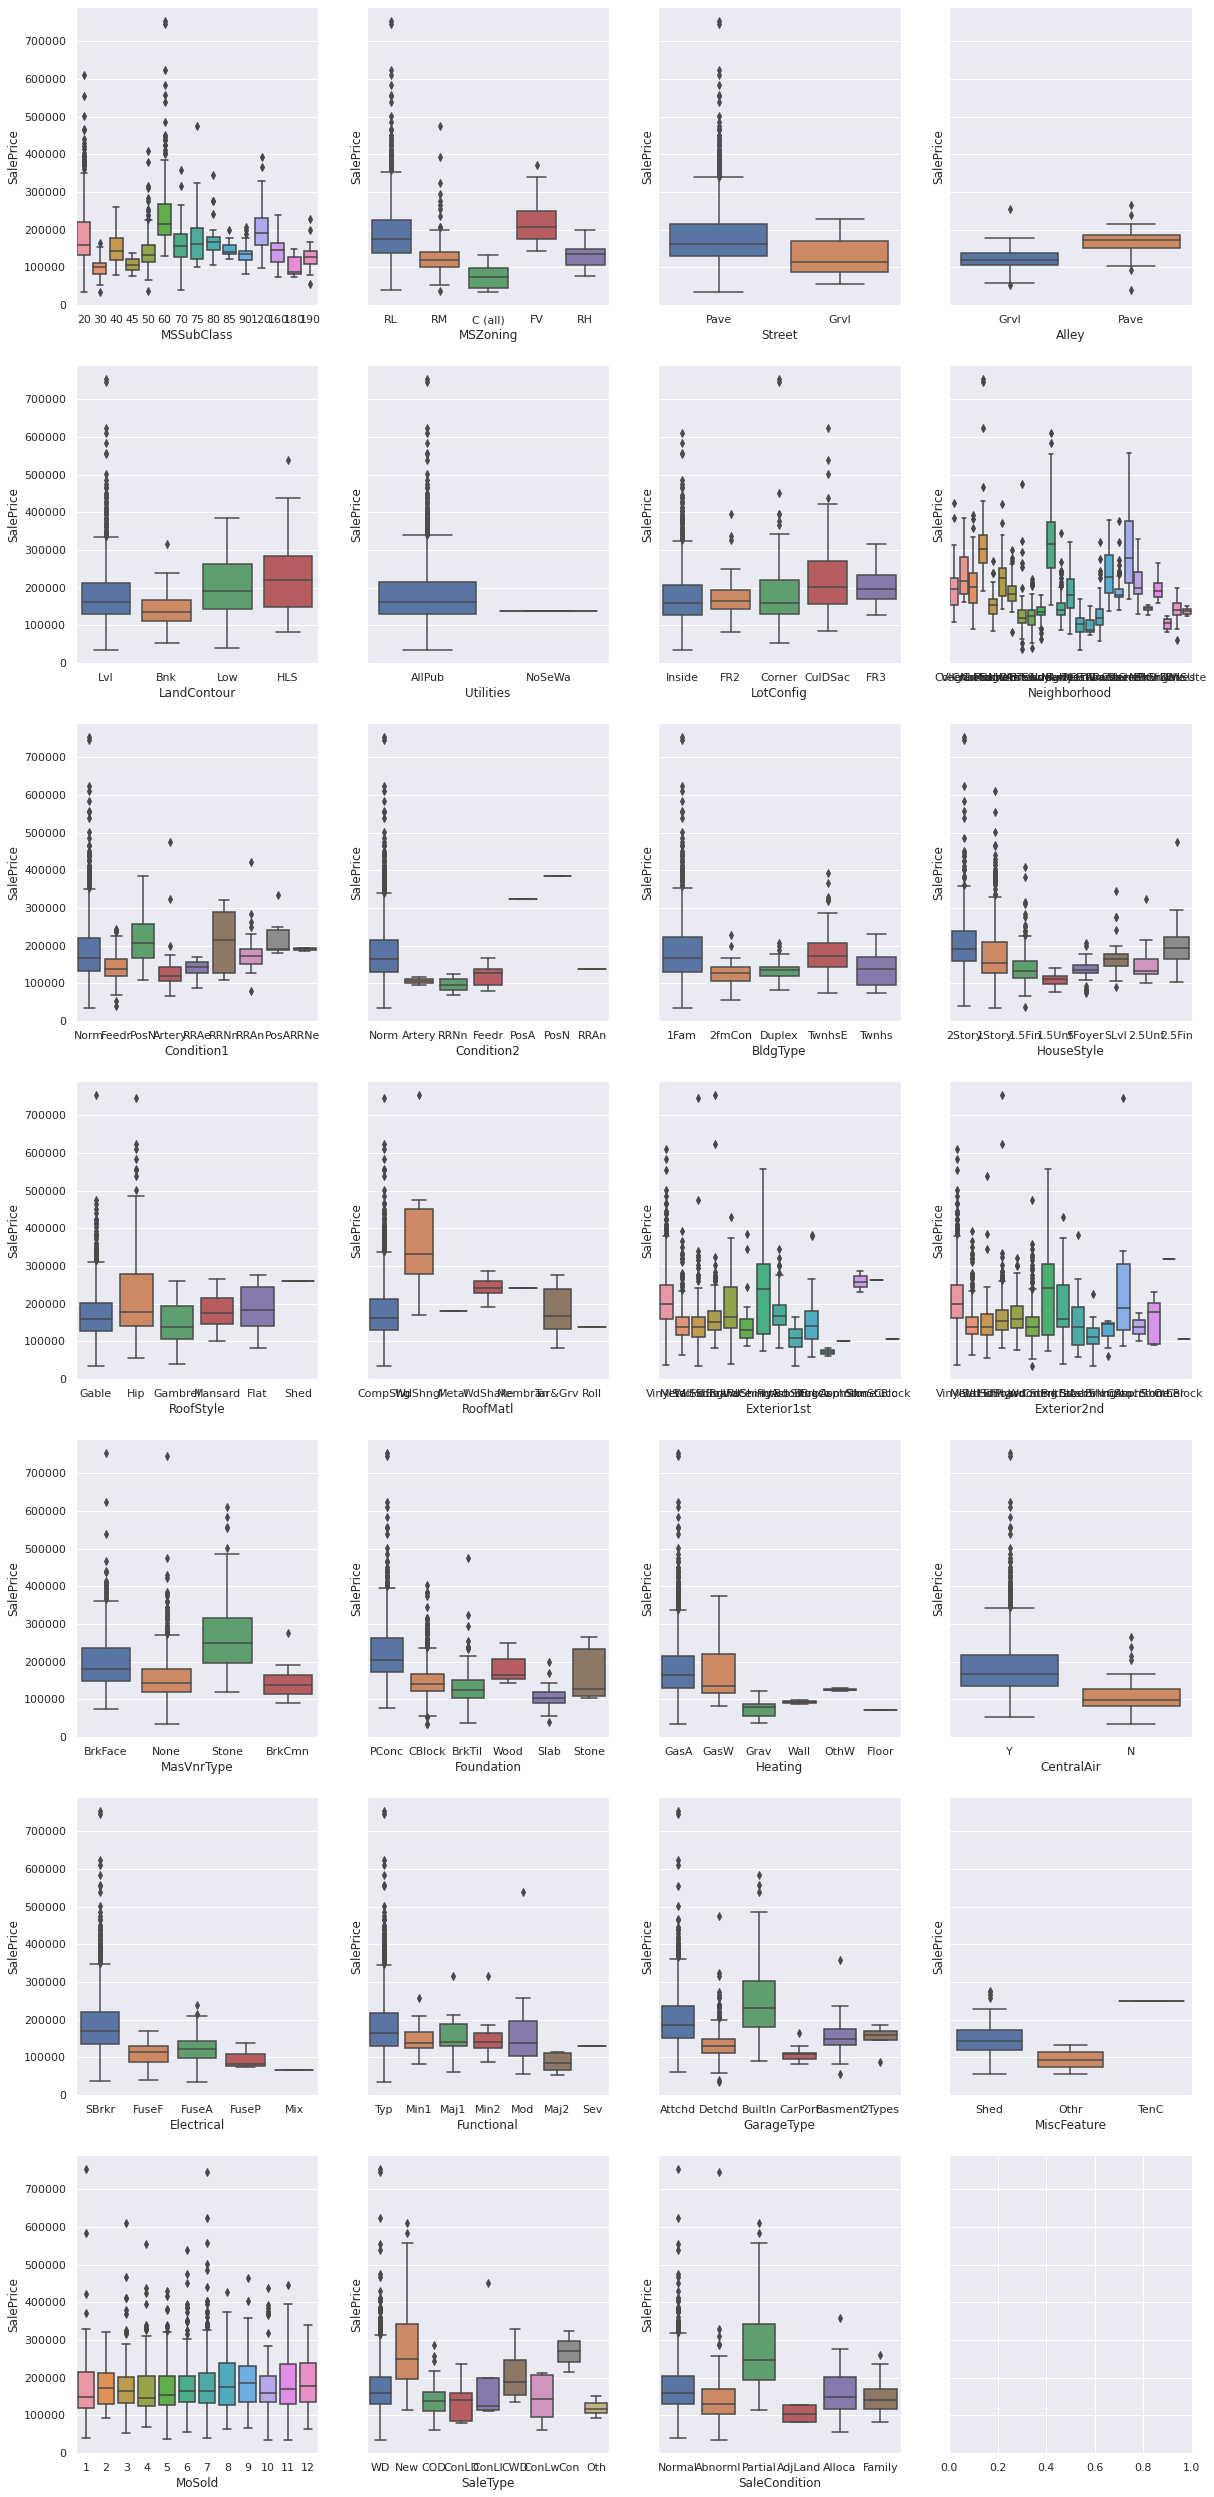

In [29]:
# Plot categorical features
fig, axes = plt.subplots(7, 4, sharey=True, figsize=(20,45))
axes = np.ravel(axes)
for i in range(len(categorical_features)):
    sns.boxplot(data=train, x=categorical_features[i], y="SalePrice", ax=axes[i])

It's difficult to indentify outliers in boxplot because the distribution of variable may not follow normal distribution.

## Fill missing values based on the description of variables

In [30]:
# concat train and test set
Xtrain = train.copy()
Ytrain = Xtrain['SalePrice'].values
Xtrain = Xtrain.drop(columns=['SalePrice', 'Id'])
Xtest = test.copy()
Xtest = Xtest.drop(columns=['Id'])
full_data = pd.concat([Xtrain, Xtest])
print(f"Number of samples: {full_data.shape[0]}")

Number of samples: 2913


In [31]:
# missing data
total = full_data.isnull().sum()
percent = (full_data.isnull().sum() / full_data.isnull().count() * 100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data[missing_data.Total > 0]

,Total,%
MSZoning,4,0.137315
LotFrontage,484,16.615173
Alley,2715,93.202884
Utilities,2,0.068658
Exterior1st,1,0.034329
Exterior2nd,1,0.034329
MasVnrType,24,0.823893
MasVnrArea,23,0.789564
BsmtQual,81,2.780639
BsmtCond,82,2.814967


In [32]:
# fill missing data
full_data['MSZoning'].fillna('None', inplace=True)
full_data['LotFrontage'].fillna(full_data['LotFrontage'].mean(), inplace=True)
full_data['Alley'].fillna('None', inplace=True)
full_data['Utilities'].fillna('None', inplace=True)
full_data['Exterior1st'].fillna('None', inplace=True)
full_data['Exterior2nd'].fillna('None', inplace=True)
full_data['MasVnrType'].fillna('None', inplace=True)
full_data['MasVnrArea'].fillna(full_data['MasVnrArea'].mean(), inplace=True)
full_data['BsmtQual'].fillna('None', inplace=True)
full_data['BsmtCond'].fillna('None', inplace=True)
full_data['BsmtExposure'].fillna('None', inplace=True)
full_data['BsmtFinType1'].fillna('None', inplace=True)
full_data['BsmtFinSF1'].fillna(full_data['BsmtFinSF1'].mean(), inplace=True)
full_data['BsmtFinType2'].fillna('None', inplace=True)
full_data['BsmtFinSF2'].fillna(full_data['BsmtFinSF2'].mean(), inplace=True)
full_data['BsmtUnfSF'].fillna(full_data['BsmtUnfSF'].mean(), inplace=True)
full_data['TotalBsmtSF'].fillna(full_data['TotalBsmtSF'].mean(), inplace=True)
full_data['Electrical'].fillna('None', inplace=True)
full_data['BsmtFullBath'].fillna(0, inplace=True)
full_data['BsmtHalfBath'].fillna(0, inplace=True)
full_data['KitchenQual'].fillna('None', inplace=True)
full_data['Functional'].fillna('None', inplace=True)
full_data['FireplaceQu'].fillna('None', inplace=True)
full_data['GarageType'].fillna('None', inplace=True)
full_data['GarageFinish'].fillna('None', inplace=True)
full_data['GarageCars'].fillna(0, inplace=True)
full_data['GarageArea'].fillna(full_data['GarageArea'].mean(), inplace=True)
full_data['GarageQual'].fillna('None', inplace=True)
full_data['GarageCond'].fillna('None', inplace=True)
full_data['PoolQC'].fillna('None', inplace=True)
full_data['Fence'].fillna('None', inplace=True)
full_data['MiscFeature'].fillna('None', inplace=True)
full_data['SaleType'].fillna('Oth', inplace=True)

In [33]:
# remove GarageYrBlt cause it's difficult to fill na for this variable
full_data.drop(columns=['GarageYrBlt'], inplace=True)
ordinal_features.remove('GarageYrBlt')

In [34]:
# review missing data
total = full_data.isnull().sum()
percent = (full_data.isnull().sum() / full_data.isnull().count() * 100)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data[missing_data.Total > 0]

,Total,%


## Feature transformation
### Transform ordinal features

In [35]:
full_data['LotShape'] = full_data['LotShape'].map({'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4})
full_data['LandSlope'] = full_data['LandSlope'].map({'Sev': 1, 'Mod': 2, 'Gtl': 3})
full_data['YearBuilt'] = full_data['YearBuilt'] - full_data['YearBuilt'].min() + 1
full_data['YearRemodAdd'] = full_data['YearRemodAdd'] - full_data['YearRemodAdd'].min() + 1
full_data['ExterQual'] = full_data['ExterQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
full_data['ExterCond'] = full_data['ExterCond'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
full_data['BsmtQual'] = full_data['BsmtQual'].map({'None': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6})
full_data['BsmtCond'] = full_data['BsmtCond'].map({'None': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6})
full_data['BsmtExposure'] = full_data['BsmtExposure'].map({'None': 1, 'No': 2, 'Mn': 3, 'Av': 4, 'Gd': 5})
full_data['BsmtFinType1'] = full_data['BsmtFinType1'].map({'None': 1, 'Unf': 2, 'LwQ': 3, 'Rec': 4, 'BLQ': 5, 'ALQ': 6, 'GLQ': 7})
full_data['BsmtFinType2'] = full_data['BsmtFinType2'].map({'None': 1, 'Unf': 2, 'LwQ': 3, 'Rec': 4, 'BLQ': 5, 'ALQ': 6, 'GLQ': 7})
full_data['HeatingQC'] = full_data['HeatingQC'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
full_data['KitchenQual'] = full_data['KitchenQual'].map({'None': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6})
full_data['FireplaceQu'] = full_data['FireplaceQu'].map({'None': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6})
full_data['GarageFinish'] = full_data['GarageFinish'].map({'None': 1, 'Unf': 2, 'RFn': 3, 'Fin': 4})
full_data['GarageQual'] = full_data['GarageQual'].map({'None': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6})
full_data['GarageCond'] = full_data['GarageCond'].map({'None': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6})
full_data['PavedDrive'] = full_data['PavedDrive'].map({'N': 1, 'P': 2, 'Y': 3})
full_data['PoolQC'] = full_data['PoolQC'].map({'None': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
full_data['Fence'] = full_data['Fence'].map({'None': 1, 'MnWw': 2, 'GdWo': 3, 'MnPrv': 4, 'GdPrv': 5})
full_data['YrSold'] = full_data['YrSold'] - full_data['YrSold'].min() + 1

### Transform categorical features

In [36]:
full_data['MSSubClass'] = full_data['MSSubClass'].astype(str)
full_data['MoSold'] = full_data['MoSold'].astype(str)
full_data = pd.get_dummies(full_data, drop_first=True)

In [37]:
# split back to train and test set
Xtrain = full_data[:len(train)]
Ytrain = train['SalePrice'].values
Xtest = full_data[len(train):]
print(Xtrain.shape)
print(Xtest.shape)

(1454, 234)
(1459, 234)


# Modeling

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

## Baseline model with Ridge regression

In [39]:
params = {"alpha": [7, 9, 11, 13]}
lr_model = GridSearchCV(estimator=Ridge(), param_grid=params, cv=5, n_jobs=-1,
                        refit=True)
lr_model.fit(Xtrain, Ytrain)
print("best params:", lr_model.best_params_)
print("best score:", lr_model.best_score_)

best params: {'alpha': 11}
best score: 0.8926616371151084


## XGBoost

In [40]:
import xgboost as xgb
from sklearn.metrics import r2_score

In [44]:
# tune the number of trees and max depth
estimater = xgb.XGBRegressor(learning_rate=0.3, objective="reg:squarederror", tree_method="gpu_hist", n_jobs=-1)
params = {"n_estimators": [100, 150, 200], "max_depth": [3, 5, 7]}
gridsearch_cv = GridSearchCV(estimater, param_grid=params, scoring="r2", cv=5, n_jobs=-1, refit=False)
gridsearch_cv.fit(Xtrain, Ytrain)
print("best params:", gridsearch_cv.best_params_)
print("best r-squared:", gridsearch_cv.best_score_)

best params: {'max_depth': 3, 'n_estimators': 200}
best r-squared: 0.9002554167532273


In [45]:
# tune learning_rate
estimater = xgb.XGBRegressor(n_estimators=200, max_depth=3, objective="reg:squarederror", tree_method="gpu_hist", n_jobs=-1)
params = {"learning_rate": [0.01, 0.1, 0.2, 0.3]}
gridsearch_cv = GridSearchCV(estimater, param_grid=params, scoring="r2", cv=5, n_jobs=-1, refit=False)
gridsearch_cv.fit(Xtrain, Ytrain)
print("best params:", gridsearch_cv.best_params_)
print("best r-squared:", gridsearch_cv.best_score_)

best params: {'learning_rate': 0.2}
best r-squared: 0.9156692472541449


In [46]:
# tune regularization
estimater = xgb.XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.2, objective="reg:squarederror",
                             tree_method="gpu_hist", n_jobs=-1)
params = {"reg_lambda": [1, 3, 5]}
gridsearch_cv = GridSearchCV(estimater, param_grid=params, scoring="r2", cv=5, n_jobs=-1, refit=False)
gridsearch_cv.fit(Xtrain, Ytrain)
print("best params:", gridsearch_cv.best_params_)
print("best r-squared:", gridsearch_cv.best_score_)

best params: {'reg_lambda': 1}
best r-squared: 0.9156692472541449


In [47]:
xgb_regressor = xgb.XGBRegressor(n_estimators=200, max_depth=3, learning_rate=0.2, reg_lambda=1,
                                 objective="reg:squarederror", tree_method="gpu_hist", n_jobs=-1)
xgb_regressor.fit(Xtrain, Ytrain)
Ytrain_pred = xgb_regressor.predict(Xtrain)
print("R-squared:", r2_score(Ytrain, Ytrain_pred))

R-squared: 0.9875593906392802


## Feature importance

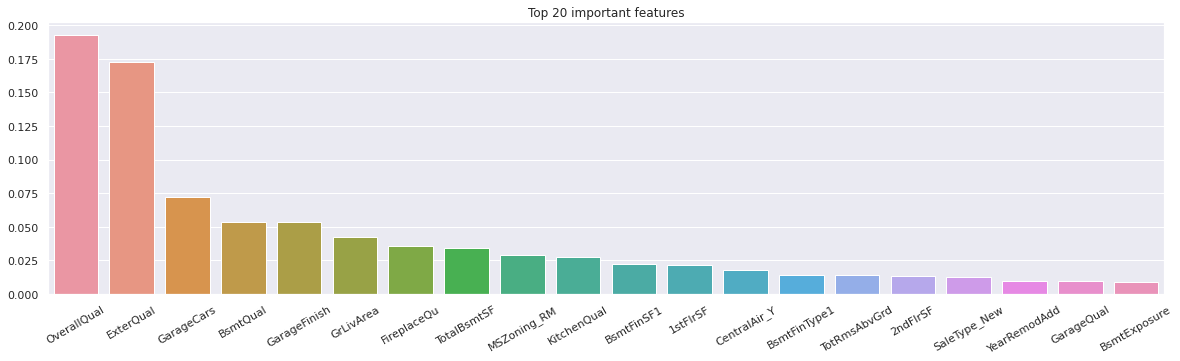

In [48]:
top_n_feature_importances = 20
sorted_indices = np.argsort(xgb_regressor.feature_importances_)[::-1][:top_n_feature_importances]
fig, ax = plt.subplots(figsize=(20, 5))
g = sns.barplot(ax=ax, x=Xtrain.columns[sorted_indices].values, y=xgb_regressor.feature_importances_[sorted_indices])
g.set(title=f"Top {top_n_feature_importances} important features")
plt.xticks(rotation=30)
plt.show()

The feature importances suggest that **the SalePrice mostly depends on**:
* the **quality of the hourse** (overal quality, external quality, kitchen quality, basement quality, fireplace quality)
* the **garage** (number of cars, garage finish or not)
* the **area of basement, ground living**

# Submission

In [49]:
Ytest = xgb_regressor.predict(Xtest)
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = Ytest
submission.to_csv('submission.csv', index=False)